<a href="https://colab.research.google.com/github/Suraez/laughing-octo-sniffle/blob/main/expt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is for converting the downloaded raw .txt data to .csv data, Ignore this if you have already got the CSV

In [ ]:
import pandas as pd

# Specify the input TXT file path and output CSV file path
txt_file_path = "/content/data_2021_azure.txt"
csv_file_path = "/content/data.csv"

# Load the TXT file into a pandas DataFrame
# Assuming the TXT file is comma-separated
df = pd.read_csv(txt_file_path, sep=",")

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"File converted and saved as {csv_file_path}")


File converted and saved as /content/data.csv


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


### Initialization

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/MyDrive/research/data.csv')

# Sort by app, func, and end_timestamp to ensure order
df = df.sort_values(by=['app', 'func', 'end_timestamp'])

# Calculate time interval in seconds between invocations for each function
df['time_interval'] = df.groupby(['app', 'func'])['end_timestamp'].diff()
df = df.dropna(subset=['time_interval'])  # Remove NaNs resulting from the first invocation


In [ ]:
intervals = df['time_interval'].values


In [ ]:
sequence_length = 10  # Adjust as needed
X = np.lib.stride_tricks.sliding_window_view(intervals, sequence_length)
y = intervals[sequence_length:]

In [ ]:
# Reshape X for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshaping to (samples, sequence_length, features)
# Ensure X and y have consistent lengths
X = X[:-1]


### Normalization of X and Y

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y = scaler.fit_transform(y.reshape(-1, 1))


In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Regularization to prevent overfitting
    Dense(50, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)


Epoch 1/2
39611/39611 ━━━━━━━━━━━━━━━━━━━━ 258s 7ms/step - loss: 3.0607e-05 - val_loss: 2.2008e-05
Epoch 2/2
39611/39611 ━━━━━━━━━━━━━━━━━━━━ 256s 6ms/step - loss: 3.0266e-05 - val_loss: 2.1416e-05


In [ ]:
# Example usage
app_id = '85479ef37b5dc75dd5aeca3bab499129b97a134dac5d740d2c68941de9d63031'  # Replace with the actual app ID
func_id = 'e02465de583b6ceffa5b78cce5f10eb27e714a8a6b3aed483be50f30a924071f'  # Replace with the actual function ID
next_invocation, predicted_interval = predict_next_invocation(model, X, df, app_id, func_id)
print(f"Predicted next invocation timestamp: {next_invocation}")
print(f"Predicted time interval: {predicted_interval}")

NameError: name 'predict_next_invocation' is not defined

In [ ]:
!git clone https://github.com/Suraez/laughing-octo-sniffle.git
%cd laughing-octo-sniffle
!git status


Cloning into 'laughing-octo-sniffle'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 4.92 KiB | 4.92 MiB/s, done.
/content/laughing-octo-sniffle
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


### Code for counting the unique value in a column

In [ ]:
# Replace 'file_path' with the path to your CSV file
file_path = '/content/sampled_dataset.csv'
# Replace 'column_name' with the name of the column you want to analyze
column_name = 'HashFunction'

def count_unique_values(file_path, column_name):
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Count the number of unique values in the specified column
        unique_count = df[column_name].nunique()
        return unique_count
    except Exception as e:
        print(f"Error: {e}")
        return None

unique_count = count_unique_values(file_path, column_name)

if unique_count is not None:
    print(f"Number of unique values in column '{column_name}': {unique_count}")


Number of unique values in column 'HashFunction': 20


### Sampling the Azure Function Invocation Traceset 2019

In [ ]:
# Assume 'file_path' is the path to your dataset
file_path = '/content/drive/MyDrive/research/data2019.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Step 1: Select the first 480 minute columns (representing the 8-hour period)
# The minute columns are assumed to start at index 3 (after 'HashOwner', 'HashApp', 'HashFunction')
start_minute = 4  # Starting index for minute columns
end_minute = start_minute + 10  # Select 10 minutes for 10 minutes
selected_columns = ['HashOwner','HashApp', 'HashFunction', 'Trigger'] + df.columns[start_minute:end_minute].tolist()

df_subset = df[selected_columns]

# Step 2: Randomly sample 20 unique functions
# Get unique functions from the 'HashFunction' column
unique_functions = df_subset['HashFunction'].unique()

# Randomly select 20 functions
sampled_functions = pd.Series(unique_functions).sample(n=20, random_state=42).tolist()

# Step 3: Filter the dataset for the sampled functions
filtered_df = df_subset[df_subset['HashFunction'].isin(sampled_functions)]

# Save the sampled dataset to a new file (optional)
filtered_df.to_csv('sampled_dataset.csv', index=False)

print("Dataset sampled for 10 minutes and 20 functions. Saved to 'sampled_dataset.csv'.")


Dataset sampled for 8 hours and 20 functions. Saved to 'sampled_dataset.csv'.


Randomization of the sampled dataset

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/sampled_dataset_1_0_10minutes.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Randomly populate 1 in columns named 1 to 10
columns_to_modify = [str(i) for i in range(1, 11)]

for column in columns_to_modify:
    # Replace all values in the column with random 0 or 1
    df[column] = np.random.choice([0, 1], size=len(df))

# Save the modified dataset
output_path = "sample_modified.csv"  # Replace with the desired save location
df.to_csv(output_path, index=False)

print(f"Modified dataset saved to {output_path}")


### printing out rows having values greater than 1

In [ ]:

# Step 1: Select the relevant columns (index 4 to 483)
numeric_columns = filtered_df.columns[3:483]  # Column indices are 0-based

# Step 2: Filter rows where any value in the specified columns is greater than 1
rows_with_values_gt_1 = filtered_df[(filtered_df[numeric_columns] > 1).any(axis=1)]

# Step 3: Print the filtered rows
print(rows_with_values_gt_1)

# Save to a CSV file (optional)
rows_with_values_gt_1.to_csv('rows_with_values_gt_1.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/sampled_dataset_0_1_10minutes.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Select columns 5 to 15 (Python indexing is zero-based, so these are columns 4 to 14)
columns_of_interest = data.iloc[:, 4:6]

# Count the total number of 1s in these columns
total_ones = (columns_of_interest == 1).sum().sum()

print(f"Total number of 1s in columns 5 to 15: {total_ones}")


Total number of 1s in columns 5 to 15: 29


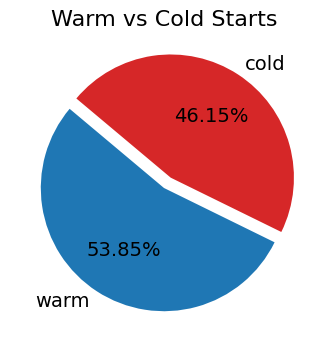

In [13]:
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd

# Paste your data here as a multiline string
data = """
Datetime,Activation ID,Kind,Start,Duration,Status,Entity
2025-01-06 15:38:08,3303766ec350417f83766ec350417ff6,python:3,cold,145ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:38:07,bcc5695e22d34b7f85695e22d32b7f37,java:8,cold,509ms,success,guest/dq:0.0.1
2025-01-06 15:38:06,2cdbdae894b145d39bdae894b1f5d37e,python:3,warm,6ms,success,guest/gb:0.0.1
2025-01-06 15:38:06,f13d1087caf943a4bd1087caf923a4c4,python:3,cold,345ms,success,guest/gb:0.0.1
2025-01-06 15:38:06,a26ffc472d3f4d15affc472d3f9d1514,python:3,warm,4ms,success,guest/sa:0.0.1
2025-01-06 15:38:05,491107855f8a4cd99107855f8a1cd9c7,python:3,cold,786ms,success,guest/sa:0.0.1
2025-01-06 15:38:04,0cdd18bd67f840109d18bd67f8401080,java:8,warm,6ms,success,guest/ds:0.0.1
2025-01-06 15:38:04,5d6c3d58b0c34155ac3d58b0c34155e2,java:8,warm,6ms,success,guest/ds:0.0.1
2025-01-06 15:38:04,4ec9e82c20fd407089e82c20fd1070d6,java:8,warm,3ms,success,guest/ds:0.0.1
2025-01-06 15:38:04,8cd592fe1aa14c9b9592fe1aa1fc9b06,java:8,cold,584ms,success,guest/ds:0.0.1
2025-01-06 15:38:03,041dac0acae547789dac0acae5b778dd,java:8,warm,48ms,success,guest/dl:0.0.1
2025-01-06 15:38:03,5ac41990bcfc43fb841990bcfc43fbde,java:8,warm,60ms,success,guest/dl:0.0.1
2025-01-06 15:38:03,a0f409bcb82b4b4ab409bcb82bcb4aeb,java:8,warm,36ms,success,guest/dl:0.0.1
2025-01-06 15:38:02,6f37fa0f19564965b7fa0f1956b9658d,java:8,cold,605ms,success,guest/dl:0.0.1
2025-01-06 15:38:02,b441743d52e0428981743d52e0428937,python:3,warm,30ms,success,guest/md:0.0.1
2025-01-06 15:38:02,6b02c2b95b1d4eee82c2b95b1dfeeecd,python:3,warm,25ms,success,guest/md:0.0.1
2025-01-06 15:38:02,a8021dc67d1742f5821dc67d17e2f5c2,python:3,warm,26ms,success,guest/md:0.0.1
2025-01-06 15:38:01,4bd88deb42f84e15988deb42f8ee15e7,python:3,cold,298ms,success,guest/md:0.0.1
2025-01-06 15:38:01,ba94fe95950144b594fe95950194b53f,python:3,warm,363ms,success,guest/fc:0.0.1
2025-01-06 15:38:00,f65e242fd43242f99e242fd43202f995,python:3,warm,356ms,success,guest/fc:0.0.1
2025-01-06 15:38:00,79b6a038552c4966b6a038552c996641,python:3,warm,374ms,success,guest/fc:0.0.1
2025-01-06 15:37:59,92d3a69a1af9438993a69a1af9b38984,python:3,cold,813ms,success,guest/fc:0.0.1
2025-01-06 15:37:59,1df63914911d41dcb63914911d81dc7f,nodejs:12,warm,5ms,application,error
2025-01-06 15:37:59,fb99ef67d5e34c1199ef67d5e32c111c,nodejs:12,warm,8ms,application,error
2025-01-06 15:37:58,7d3dc813c9ea477fbdc813c9eaf77fe4,nodejs:12,cold,479ms,application,error
2025-01-06 15:37:58,9553556b54ca4a4e93556b54ca7a4ee7,nodejs:12,warm,67ms,success,guest/is:0.0.1
2025-01-06 15:37:57,0e82a048ce4b469882a048ce4b669815,nodejs:12,cold,715ms,success,guest/is:0.0.1
2025-01-06 15:37:56,84b4ff15f9b540beb4ff15f9b5d0be8a,java:8,warm,4ms,success,guest/dg:0.0.1
2025-01-06 15:37:56,553455583dd84de0b455583dd8ede0d2,java:8,cold,500ms,success,guest/dg:0.0.1
2025-01-06 15:37:55,dbf2fe44e76e48c8b2fe44e76e48c81a,java:8,cold,584ms,success,guest/dt:0.0.1
2025-01-06 15:37:54,4574b05fef2d4799b4b05fef2d47995f,python:3,cold,830ms,success,guest/gp:0.0.1
2025-01-06 15:37:53,ac1ed3c5f02f40439ed3c5f02f30430a,python:3,cold,294ms,success,guest/gb:0.0.1
2025-01-06 15:37:52,0c8e465f3a1044658e465f3a104465b9,nodejs:12,warm,270ms,success,guest/tn:0.0.1
2025-01-06 15:37:52,7590d35b2b25406a90d35b2b25a06ac9,nodejs:12,warm,232ms,success,guest/tn:0.0.1
2025-01-06 15:37:51,1921e8134b564443a1e8134b567443eb,nodejs:12,cold,968ms,success,guest/tn:0.0.1
2025-01-06 15:37:51,71e2589b07c54102a2589b07c5d10286,nodejs:12,warm,4ms,success,guest/oi:0.0.1
2025-01-06 15:37:51,92cc9882525040108c9882525020107a,nodejs:12,warm,3ms,success,guest/oi:0.0.1
2025-01-06 15:37:50,bfca159afa0445988a159afa0415980a,nodejs:12,cold,250ms,success,guest/oi:0.0.1
2025-01-06 15:37:50,cbe97373e02849eda97373e02879edcd,nodejs:12,warm,8ms,success,guest/ac:0.0.1
2025-01-06 15:37:50,d9fadd802359406abadd802359806adc,nodejs:12,cold,208ms,success,guest/ac:0.0.1
2025-01-06 15:37:49,46f773f2eff242f9b773f2eff202f92e,python:3,cold,123ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:49,c131559540804d48b1559540809d48d2,java:8,warm,4ms,success,guest/dq:0.0.1
2025-01-06 15:37:48,40efd62526334e20afd6252633be2070,java:8,cold,564ms,success,guest/dq:0.0.1
2025-01-06 15:37:48,d7e30942f2a84472a30942f2a8a4722b,python:3,warm,5ms,success,guest/sa:0.0.1
2025-01-06 15:37:47,993c5f5c320a41aebc5f5c320a01ae90,python:3,cold,923ms,success,guest/sa:0.0.1
2025-01-06 15:37:46,270d1d8fd6ad45e38d1d8fd6ad25e38e,nodejs:12,warm,288ms,success,guest/is:0.0.1
2025-01-06 15:37:46,090b981364b741908b981364b7219002,nodejs:12,warm,231ms,success,guest/is:0.0.1
2025-01-06 15:37:45,a42258d4838a4b1fa258d4838adb1ff9,nodejs:12,warm,72ms,success,guest/is:0.0.1
2025-01-06 15:37:45,ba73ce6b48254129b3ce6b4825a12946,nodejs:12,cold,726ms,success,guest/is:0.0.1
2025-01-06 15:37:44,e46ee465f516485aaee465f516b85a56,java:8,warm,6ms,success,guest/dg:0.0.1
2025-01-06 15:37:44,b8e580b51b404c09a580b51b409c0909,java:8,warm,9ms,success,guest/dg:0.0.1
2025-01-06 15:37:44,2ec71cc28e5f4202871cc28e5fb202fe,java:8,warm,4ms,success,guest/dg:0.0.1
2025-01-06 15:37:44,ff411e83b2ae4a9d811e83b2ae5a9df2,java:8,cold,564ms,success,guest/dg:0.0.1
2025-01-06 15:37:43,d63bf0df104a4138bbf0df104ae1384e,python:3,warm,49ms,success,guest/gp:0.0.1
2025-01-06 15:37:43,c6c63b92692f47db863b92692f07db38,python:3,warm,16ms,success,guest/gp:0.0.1
2025-01-06 15:37:42,f83daa8ea67b47cbbdaa8ea67b87cbe0,python:3,warm,789ms,success,guest/gp:0.0.1
2025-01-06 15:37:42,d517b2fa34d3418397b2fa34d3b183b6,python:3,cold,389ms,success,guest/gp:0.0.1
2025-01-06 15:37:41,0b83c5ee7bab4ffe83c5ee7bab1ffe76,python:3,warm,17ms,success,guest/dv:0.0.1
2025-01-06 15:37:41,f1c10773272a485e810773272a185ee1,python:3,warm,12ms,success,guest/dv:0.0.1
2025-01-06 15:37:41,874d890000e248ad8d890000e2c8ade6,python:3,warm,18ms,success,guest/dv:0.0.1
2025-01-06 15:37:41,12310ca4a33f4499b10ca4a33fe49937,python:3,cold,422ms,success,guest/dv:0.0.1
2025-01-06 15:37:39,60e3569edcbe4fd9a3569edcbe2fd9fd,python:3,cold,806ms,success,guest/fc:0.0.1
2025-01-06 15:37:39,18ac1fa8e8c7412eac1fa8e8c7d12e68,nodejs:12,warm,4ms,success,guest/dh:0.0.1
2025-01-06 15:37:39,3ceef78cac614172aef78cac61e172d9,nodejs:12,warm,6ms,success,guest/dh:0.0.1
2025-01-06 15:37:39,0eda4b4ba9bc49d69a4b4ba9bce9d663,nodejs:12,warm,5ms,success,guest/dh:0.0.1
2025-01-06 15:37:39,e40c2b25f0d444eb8c2b25f0d4a4ebcc,nodejs:12,cold,282ms,success,guest/dh:0.0.1
2025-01-06 15:37:38,4000d5f7287c4ce580d5f7287c8ce554,nodejs:12,warm,60ms,success,guest/is:0.0.1
2025-01-06 15:37:37,cd606b1445ab46dea06b1445abb6de42,nodejs:12,cold,755ms,success,guest/is:0.0.1
2025-01-06 15:37:37,0c9da396537c4d269da396537ced2627,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:37,bc9ab0eedab940cf9ab0eedab9f0cfa2,python:3,warm,1ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:37,1cd4812ee23a4c7c94812ee23abc7cf6,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:37,6ec6d623f16e4a6d86d623f16eaa6d4f,python:3,cold,130ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:36,71874bf848484c2e874bf848482c2eff,java:8,cold,500ms,success,guest/dl:0.0.1
2025-01-06 15:37:35,06ae459fc8754962ae459fc8759962ce,java:8,cold,381ms,success,guest/dt:0.0.1
2025-01-06 15:37:35,3d6344e0f143487ea344e0f143a87e40,python:3,warm,81ms,success,guest/ir:0.0.1
2025-01-06 15:37:35,96ba3ca1365c4225ba3ca1365c82259d,python:3,warm,75ms,success,guest/ir:0.0.1
2025-01-06 15:37:29,1922ebe0e822414da2ebe0e822b14d68,python:3,cold,5.28s,success,guest/ir:0.0.1
2025-01-06 15:37:27,15a32052219043c6a32052219043c612,nodejs:12,cold,1.401s,success,guest/tn:0.0.1
2025-01-06 15:37:27,de9d0cb002ae4b939d0cb002ae7b93f4,nodejs:12,warm,4ms,success,guest/ac:0.0.1
2025-01-06 15:37:27,2caadd93d497400daadd93d497700d91,nodejs:12,warm,3ms,success,guest/ac:0.0.1
2025-01-06 15:37:27,caf8072da49b4457b8072da49b3457d9,nodejs:12,cold,210ms,success,guest/ac:0.0.1
2025-01-06 15:37:26,3faaeaedcb6c4a0faaeaedcb6cba0f3b,python:3,warm,1ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:26,a5d5537c0d5046f695537c0d5046f684,python:3,warm,3ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:26,2c530079714141d09300797141d1d06e,python:3,cold,124ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:26,f965c93b3e5143b8a5c93b3e51f3b8ea,java:8,warm,6ms,success,guest/ds:0.0.1
2025-01-06 15:37:26,7be797b556e24ffaa797b556e2dffaa4,java:8,warm,5ms,success,guest/ds:0.0.1
2025-01-06 15:37:25,7a51eec7e80d43df91eec7e80dc3dfe2,java:8,cold,528ms,success,guest/ds:0.0.1
2025-01-06 15:37:24,d3dcc075a10a41329cc075a10a4132b1,python:3,cold,332ms,success,guest/gp:0.0.1
2025-01-06 15:37:24,13e35e64beb24594a35e64beb255943d,python:3,warm,9ms,success,guest/gb:0.0.1
2025-01-06 15:37:23,df9c50edc3c14cf39c50edc3c15cf31e,python:3,cold,399ms,success,guest/gb:0.0.1
2025-01-06 15:37:22,813bc3b1ea24438dbbc3b1ea24f38d52,python:3,cold,520ms,success,guest/dv:0.0.1
2025-01-06 15:37:21,0a77cd2ad1ed49adb7cd2ad1ed59ad27,python:3,cold,793ms,success,guest/sa:0.0.1
2025-01-06 15:37:20,d3ed1dbc964d49adad1dbc964d29ad95,python:3,cold,718ms,success,guest/fc:0.0.1
2025-01-06 15:37:19,95348ca5e7464abeb48ca5e7467abe41,nodejs:12,cold,233ms,success,guest/dh:0.0.1
2025-01-06 15:37:19,c5708100f4ee424ab08100f4ee724a85,nodejs:12,cold,250ms,success,guest/oi:0.0.1
2025-01-06 15:37:18,03362ac129d044aeb62ac129d074ae25,nodejs:12,cold,817ms,success,guest/is:0.0.1
2025-01-06 15:37:17,967b4e8714ca4a0bbb4e8714ca8a0bec,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:17,fd7ce27d24a44f02bce27d24a4bf02a8,python:3,warm,2ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:17,12969f952563464c969f952563064c54,python:3,cold,128ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:37:16,79be397271744c0ebe397271743c0e71,java:8,warm,9ms,success,guest/ds:0.0.1
2025-01-06 15:37:16,a16d810c620e4d23ad810c620ecd2383,java:8,warm,4ms,success,guest/ds:0.0.1
2025-01-06 15:37:16,f757e57c649a43f097e57c649a13f08e,java:8,cold,552ms,success,guest/ds:0.0.1
2025-01-06 15:37:15,769883c6c0b942309883c6c0b9e23086,java:8,cold,592ms,success,guest/dt:0.0.1
2025-01-06 15:37:14,fb82c46763c545f382c46763c5d5f3a0,python:3,cold,341ms,success,guest/gm:0.0.1
2025-01-06 15:37:14,f7ead8fee93d4a90aad8fee93dda90bf,python:3,warm,17ms,success,guest/dv:0.0.1
2025-01-06 15:37:13,76a6fddd8f79456fa6fddd8f79b56f76,python:3,cold,537ms,success,guest/dv:0.0.1
2025-01-06 15:37:12,0a74a501281240d7b4a501281220d7de,python:3,cold,748ms,success,guest/fc:0.0.1
2025-01-06 15:37:11,584a96b1b4c0498e8a96b1b4c0998ee7,nodejs:12,warm,7ms,application,error
2025-01-06 15:37:11,2cbb8a43ea8d4bb2bb8a43ea8ddbb27f,nodejs:12,cold,402ms,application,error
2025-01-06 15:37:10,2223ea0913ca4c08a3ea0913ca7c08ee,nodejs:12,warm,193ms,success,guest/is:0.0.1
2025-01-06 15:37:10,eef05095718d4c10b05095718d8c1011,nodejs:12,warm,56ms,success,guest/is:0.0.1
2025-01-06 15:37:09,6133b5ba357d468fb3b5ba357d268f83,nodejs:12,cold,740ms,success,guest/is:0.0.1
2025-01-06 15:37:09,04d7ca93fc9a477697ca93fc9a377671,java:8,warm,4ms,success,guest/dg:0.0.1
2025-01-06 15:37:08,fe85e8b1f9e64bc485e8b1f9e6fbc469,java:8,cold,579ms,success,guest/dg:0.0.1
2025-01-06 15:37:07,4713e996f1e6448a93e996f1e6c48a2b,java:8,cold,635ms,success,guest/dl:0.0.1
2025-01-06 15:37:06,d395a0687346414295a0687346c142fc,python:3,cold,271ms,success,guest/gp:0.0.1
2025-01-06 15:37:06,a24bf765f6f84eda8bf765f6f8deda12,python:3,cold,573ms,success,guest/sa:0.0.1
2025-01-06 15:37:05,fe95cd2e7352437e95cd2e7352037eed,python:3,warm,72ms,success,guest/ir:0.0.1
2025-01-06 15:36:59,81fb317613cc4194bb317613cc8194bd,python:3,cold,5.759s,success,guest/ir:0.0.1
2025-01-06 15:36:59,e5b918061eb14df1b918061eb1edf127,nodejs:12,cold,286ms,success,guest/dh:0.0.1
2025-01-06 15:36:58,68914d05adb241c2914d05adb2e1c2b6,nodejs:12,warm,4ms,success,guest/ac:0.0.1
2025-01-06 15:36:58,e084819c18484c5d84819c18486c5dfb,nodejs:12,warm,4ms,success,guest/ac:0.0.1
2025-01-06 15:36:58,62649933cc4b4ca8a49933cc4beca8e5,nodejs:12,cold,268ms,success,guest/ac:0.0.1
2025-01-06 15:36:57,ab2831c8aaca4069a831c8aaca406973,python:3,cold,142ms,success,guest/EndExperiment:0.0.1
2025-01-06 15:36:57,428bcee6c4424bcb8bcee6c4429bcb91,java:8,warm,5ms,success,guest/dq:0.0.1
2025-01-06 15:36:57,bab8a32570b342ffb8a32570b3c2ff71,java:8,warm,4ms,success,guest/dq:0.0.1
2025-01-06 15:36:57,7267fd41da1b447ca7fd41da1bb47c03,java:8,warm,4ms,success,guest/dq:0.0.1
2025-01-06 15:36:56,eb97a961190b497d97a961190b797df2,java:8,cold,556ms,success,guest/dq:0.0.1
2025-01-06 15:36:55,2476bbb49d89494fb6bbb49d89e94f3c,python:3,cold,305ms,success,guest/gb:0.0.1
2025-01-06 15:36:55,3205e88dcb6a4f7c85e88dcb6aef7c12,python:3,warm,19ms,success,guest/md:0.0.1
2025-01-06 15:36:55,63a4682ebe684f82a4682ebe68bf82c0,python:3,cold,181ms,success,guest/md:0.0.1
2025-01-06 15:36:54,83bb5dec2c5840c3bb5dec2c58e0c385,nodejs:12,warm,194ms,success,guest/tn:0.0.1
2025-01-06 15:36:54,0ea679f9eceb49eca679f9ecebb9ec57,nodejs:12,warm,236ms,success,guest/tn:0.0.1
2025-01-06 15:36:54,df39e0780c7940feb9e0780c7910fe13,nodejs:12,warm,197ms,success,guest/tn:0.0.1
2025-01-06 15:36:53,b238922dfd784014b8922dfd7830143e,nodejs:12,cold,898ms,success,guest/tn:0.0.1
2025-01-06 15:36:52,16025277e1fa447a825277e1fa147af4,nodejs:12,warm,4ms,success,guest/dh:0.0.1
2025-01-06 15:36:52,e4c89030a7644cc7889030a7646cc7ea,nodejs:12,cold,167ms,success,guest/dh:0.0.1
2025-01-06 15:36:52,b16af22f877445e3aaf22f877475e300,nodejs:12,warm,73ms,success,guest/is:0.0.1
2025-01-06 15:36:51,e98da0ae54cd4fab8da0ae54cddfab3d,nodejs:12,warm,74ms,success,guest/is:0.0.1
2025-01-06 15:36:51,f800c0f1e4664e6c80c0f1e4666e6c78,nodejs:12,warm,85ms,success,guest/is:0.0.1
2025-01-06 15:36:51,3b44b46960674f8e84b46960672f8e7e,nodejs:12,warm,161ms,success,guest/is:0.0.1
2025-01-06 15:36:51,1af8d985564042fbb8d985564082fb50,nodejs:12,cold,422ms,success,guest/is:0.0.1
2025-01-06 15:36:50,a4507b9c37564613907b9c37565613f9,nodejs:12,cold,142ms,success,guest/ac:0.0.1
"""

# Read the data into a DataFrame
df = pd.read_csv(StringIO(data))

# Count occurrences of 'warm' and 'cold' in the "Start" column
start_counts = df['Start'].value_counts()

# Extract the data for the pie chart
labels = start_counts.index.tolist()  # ['cold', 'warm']
sizes = start_counts.values.tolist()  # [count_cold, count_warm]
colors = ['#1f77b4', '#d62728']  # Custom colors for cold and warm
explode = [0.1 if label == 'cold' else 0 for label in labels]  # Explode 'cold' slice

# Create the pie chart
plt.figure(figsize=(4, 4))  # Set the figure size
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',  # Display percentages with two decimal points
    startangle=140,  # Start angle for better visualization
    colors=colors,
    explode=explode,
    textprops={'fontsize': 14}  # Font size for better readability
)

# Add a title
plt.title('Warm vs Cold Starts', fontsize=16)

# Show the pie chart
plt.show()
